### 2017年计算传播学工作坊
***
***
# 主题模型

***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

2014年高考前夕，百度“基于海量作文范文和搜索数据，利用概率主题模型，预测2014年高考作文的命题方向”。如上图所示，共分为了六个主题：时间、生命、民族、教育、心灵、发展。而每个主题下面又包括了一些具体的关键词。比如，生命的主题对应：平凡、自由、美丽、梦想、奋斗、青春、快乐、孤独。

[Read more](https://site.douban.com/146782/widget/notes/15462869/note/356806087/)

![](./files/baidu_gaokao.jpg)

# latent Dirichlet allocation (LDA)

The simplest topic model (on which all others are based) is latent Dirichlet allocation (LDA). 
- LDA is a generative model that infers unobserved meanings from a large set of observations. 

## Reference

- Blei DM, Ng J, Jordan MI. Latent dirichlet allocation. J Mach Learn Res. 2003; 3: 993–1022.
- Blei DM, Lafferty JD. Correction: a correlated topic model of science. Ann Appl Stat. 2007; 1: 634. 
- Blei DM. Probabilistic topic models. Commun ACM. 2012; 55: 55–65.
- Chandra Y, Jiang LC, Wang C-J (2016) Mining Social Entrepreneurship Strategies Using Topic Modeling. PLoS ONE 11(3): e0151342. doi:10.1371/journal.pone.0151342

<img src = './img/topic.png' width = 1000>

- Topic models assume that each document contains a mixture of topics
    - Topics are considered latent/unobserved variables that stand between the documents and terms

It is impossible to directly assess the relationships between topics and documents and between topics and terms. 
- What can be directly observed is the distribution of terms over documents, which is known as the document term matrix (DTM).

Topic models algorithmically identify the best set of latent variables (topics) that can best explain the observed distribution of terms in the documents. 

The DTM is further decomposed into two matrices：
- a term-topic matrix (TTM) 
- a topic-document matrix (TDM)

Each document can be assigned to a primary topic that demonstrates the highest topic-document probability and can then be linked to other topics with declining probabilities.

Assume K topics are in D documents, and each topic is denoted with $\phi_{1:K}$. 

Each topic $\phi_K$ is a distribution of fixed words in the given documents. 

The topic proportion in the document is denoted as $\theta_d$. 
- e.g., the kth topic's proportion in document d is $\theta_{d, k}$. 

Let $w_{d,n}$ denote the nth term in document d. 

Further, topic models assign topics to a document and its terms. 
- For example, the topic assigned to document d is denoted as $z_d$, 
    - and the topic assigned to the nth term in document d is denoted as $z_{d,n}$. 

According to Blei et al. the joint distribution of $\phi_{1:K}$,$\theta_{1:D}$, $z_{1:D}$ and $w_{d, n}$ plus the generative process for LDA can be expressed as:

$ p(\phi_{1:K}, \theta_{1:D}, z_{1:D}, w_{d, n}) $ = 

$\prod_{i=1}^{K} p(\phi_i) \prod_{d =1}^D p(\theta_d)(\prod_{n=1}^N p(z_{d,n} \mid \theta_d) \times p(w_{d, n} \mid \phi_{1:K}, Z_{d, n})  ) $


Note that $\phi_{1:k},\theta_{1:D},and z_{1:D}$ are latent, unobservable variables. Thus, the computational challenge of LDA is to compute the conditional distribution of them given the observable specific words in the documents $w_{d, n}$. 

Accordingly, the posterior distribution of LDA can be expressed as:

## $p(\phi_{1:K}, \theta_{1:D}, z_{1:D} \mid w_{d, n}) = \frac{p(\phi_{1:K}, \theta_{1:D}, z_{1:D}, w_{d, n})}{p(w_{1:D})}$

Because the number of possible topic structures is exponentially large, it is impossible to compute the posterior of LDA. Topic models aim to develop efficient algorithms to approximate the posterior of LDA. 
- There are two categories of algorithms: 
    - sampling-based algorithms
    - variational algorithms 
    
Using the Gibbs sampling method, we can build a Markov chain for the sequence of random variables (see Eq 1). The sampling algorithm is applied to the chain to sample from the limited distribution, and it approximates the posterior. 


# Gensim

Unfortunately, scikit-learn does not support latent Dirichlet allocation.

Therefore, we are going to use the gensim package in Python. 

Gensim is developed by Radim Řehůřek,who is a machine learning researcher and consultant in the Czech Republic. We must start by installing it. We can achieve this by running one of the following commands:

> # pip install gensim


In [1]:
%matplotlib inline
from __future__ import print_function
from wordcloud import WordCloud
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

# Download data

<del>http://www.cs.princeton.edu/~blei/lda-c/ap.tgz</del>

http://www.cs.columbia.edu/~blei/lda-c/

Unzip the data and put them into /Users/chengjun/bigdata/ap/

In [22]:
# Load the data
corpus = corpora.BleiCorpus('/Users/chengjun/bigdata/ap/ap.dat',\
                            '/Users/chengjun/bigdata/ap/vocab.txt')

In [23]:
' '.join(dir(corpus))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __iter__ __len__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _smart_save docbyoffset fname id2word index length line2doc load save save_corpus serialize'

In [24]:
corpus.id2word.items()[:3]

[(0, u'i'), (1, u'new'), (2, u'percent')]

# Build the topic model

In [25]:
NUM_TOPICS = 100

In [26]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, 
    id2word=corpus.id2word, 
    alpha=None)

/Users/chengjun/anaconda/lib/python2.7/site-packages/gensim/models/ldamodel.py:379: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  expElogbetad = self.expElogbeta[:, ids]
/Users/chengjun/anaconda/lib/python2.7/site-packages/gensim/models/ldamodel.py:404: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  sstats[:, ids] += numpy.outer(expElogthetad.T, cts / phinorm)
/Users/chengjun/anaconda/lib/python2.7/site-packages/gensim/models/ldamodel.py:659: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score += numpy.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, id]) for id, cnt in doc)


In [27]:
' '.join(dir(model))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _apply _smart_save alpha bound chunksize clear decay dispatcher distributed do_estep do_mstep eta eval_every expElogbeta gamma_threshold id2word inference iterations load log_perplexity num_terms num_topics num_updates numworkers offset optimize_alpha passes print_topic print_topics save show_topic show_topics state sync_state top_topics update update_alpha update_every'

# We can see the list of topics a document refers to 

by using the model[doc] syntax:

In [28]:
document_topics = [model[c] for c in corpus]

In [29]:
# how many topics does one document cover?
document_topics[2]

[(1, 0.012173218478465178),
 (5, 0.010844598121070434),
 (9, 0.017341043056838871),
 (11, 0.024468311850992307),
 (13, 0.011713551338282521),
 (17, 0.12008191700644692),
 (26, 0.2653896038945065),
 (36, 0.016205103283848322),
 (40, 0.063642155983975865),
 (42, 0.10912551497030909),
 (43, 0.18969307606619615),
 (54, 0.029152810319599372),
 (70, 0.027382335898959255),
 (73, 0.079544001401190376)]

In [30]:
# The first topic
# format: weight, term
model.show_topic(0, 10)

[(0.010029947066157719, u'cents'),
 (0.0084518751921951272, u'sheet'),
 (0.006971130612136031, u'people'),
 (0.0069681226790944068, u'videos'),
 (0.0061501028198266746, u'designs'),
 (0.0059801669571577327, u'threeway'),
 (0.0051079365521994723, u'mca'),
 (0.0042408541343766145, u'new'),
 (0.0038503471959112092, u'today'),
 (0.0034815721467352559, u'year')]

In [31]:
# The 100 topic
# format: weight, term
model.show_topic(99, 10)

[(0.012503720479598517, u'billion'),
 (0.0093416080644276624, u'bomber'),
 (0.0080440160210163321, u'fiscal'),
 (0.0073821380604033784, u'defense'),
 (0.0059336615162439077, u'air'),
 (0.0057387426153885654, u'safety'),
 (0.005239704830984784, u'year'),
 (0.0047342102096198735, u'nuclear'),
 (0.0046810109846632626, u'north'),
 (0.004498783524243005, u'million')]

In [32]:
words = model.show_topic(0, 5)
words

[(0.010029947066157719, u'cents'),
 (0.0084518751921951272, u'sheet'),
 (0.006971130612136031, u'people'),
 (0.0069681226790944068, u'videos'),
 (0.0061501028198266746, u'designs')]

In [33]:
model.show_topics(4)

[u'0.011*government + 0.010*hughes + 0.009*communist + 0.008*party + 0.007*fellows + 0.006*leader + 0.006*cordon + 0.005*people + 0.005*president + 0.005*fair',
 u'0.132*cdy + 0.118*clr + 0.042*rn + 0.011*m + 0.010*rome + 0.008*frankfurt + 0.005*new + 0.004*paris + 0.004*tokyo + 0.003*i',
 u'0.033*percent + 0.012*year + 0.011*billion + 0.009*states + 0.006*last + 0.005*ec + 0.005*years + 0.005*new + 0.005*tax + 0.005*orders',
 u'0.014*percent + 0.011*million + 0.007*africa + 0.007*south + 0.007*sales + 0.006*share + 0.006*year + 0.005*wednesdays + 0.005*new + 0.005*mandela']

In [34]:
for f, w in words[:10]:
    print(f, w)

0.0100299470662 cents
0.0084518751922 sheet
0.00697113061214 people
0.00696812267909 videos
0.00615010281983 designs


In [39]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(f for f, w in words)
    with open('/Users/chengjun/github/workshop/data/topics_term_weight.txt', 'a') as output:
        for f, w in words:
            line = str(ti) + '\t' +  w + '\t' + str(f/tf) 
            output.write(line + '\n')

In [40]:
# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corp us], 
                               num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [216]:
# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)
words = np.array(words).T
words_freq=[float(i)*10000000 for i in words[0]]
words = zip(words[1], words_freq)

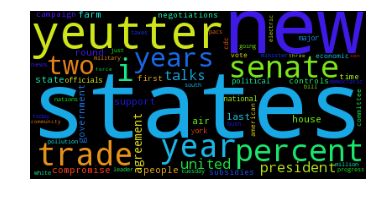

In [219]:
wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

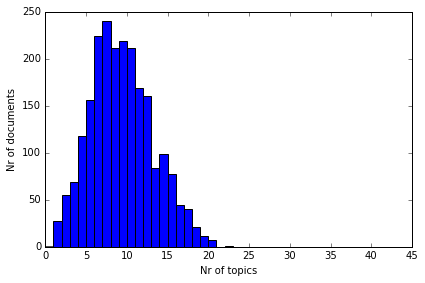

In [104]:
num_topics_used = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

# We can see that about 150 documents have 5 topics, 
- while the majority deal with around 10 to 12 of them. 
    - No document talks about more than 20 topics.

In [109]:
# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play around with this parameter
ALPHA = 1.0
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, 
    alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

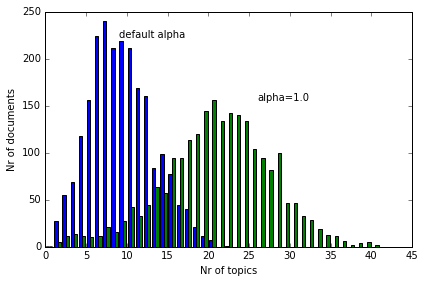

In [108]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
# The coordinates below were fit by trial and error to look good
plt.text(9, 223, r'default alpha')
plt.text(26, 156, 'alpha=1.0')
fig.tight_layout()

# 使用pyLDAvis可视化主题模型
http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb

> # pip install pyldavis

# 读取并清洗数据

In [21]:
with open('/Users/chengjun/bigdata/ap/ap.txt', 'r') as f:
    dat = f.readlines()

In [2]:
dat[:6]

['<DOC>\n',
 '<DOCNO> AP881218-0003 </DOCNO>\n',
 '<TEXT>\n',
 " A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Fri

In [3]:
dat[4].strip()[0]

'<'

In [22]:
docs = []
for i in dat[:100]:
    if i.strip()[0] != '<':
        docs.append(i)

In [23]:
def clean_doc(doc):
    doc = doc.replace('.', '').replace(',', '')
    doc = doc.replace('``', '').replace('"', '')
    doc = doc.replace('_', '').replace("'", '')
    doc = doc.replace('!', '')
    return doc
docs = [clean_doc(doc) for doc in docs]

In [24]:
texts = [[i for i in doc.lower().split()] for doc in docs]

In [ ]:
import nltk
nltk.download()
# 会打开一个窗口，选择book，download，待下载完毕就可以使用了。

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english') # 如果此处出错，请执行上一个block的代码

In [8]:
' '.join(stop)

u'i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don should now d ll m o re ve y ain aren couldn didn doesn hadn hasn haven isn ma mightn mustn needn shan shouldn wasn weren won wouldn'

In [9]:
stop.append('said')

In [10]:
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text \
          if frequency[token] > 1 and token not in stop]
        for text in texts]

In [11]:
docs[8]

' Here is a summary of developments in forest and brush fires in Western states:\n'

In [12]:
' '.join(texts[9])

'stirbois 2 man extreme-right national front party le pen died saturday automobile police 43 stirbois political meeting friday city dreux miles west paris traveling toward capital car ran police stirbois national front member party since born paris law headed business stirbois several extreme-right political joining national front 1977 percent vote local elections west paris highest vote percentage candidate year half later deputy dreux stirbois deputy national 1986 lost elections last national front founded le pen frances government death priority first years presidential elections le pen percent vote national front could'

In [15]:
dictionary = corpora.Dictionary(texts)
lda_corpus = [dictionary.doc2bow(text) for text in texts]
#The function doc2bow() simply counts the number of occurences of each distinct word, 
# converts the word to its integer word id and returns the result as a sparse vector. 

In [17]:
NUM_TOPICS = 10
lda_model = models.ldamodel.LdaModel(
    lda_corpus, num_topics=NUM_TOPICS, 
    id2word=dictionary, alpha=None)

In [25]:
import pyLDAvis.gensim

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary)

In [20]:
pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [220]:
pyLDAvis.save_html(ap_data, '/Users/chengjun/github/workshop/vis/ap_ldavis.html')

## 对2016年政府工作报告建立主题模型

# pip install jieba
> https://github.com/fxsjy/jieba

# pip install wordcloud
>  https://github.com/amueller/word_cloud

# pip install gensim

In [52]:
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import matplotlib
matplotlib.rc("savefig", dpi=400)
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 

In [7]:
import urllib2
from bs4 import BeautifulSoup
import sys

url2016 = 'http://news.xinhuanet.com/fortune/2016-03/05/c_128775704.htm'
content = urllib2.urlopen(url2016).read()
soup = BeautifulSoup(content) 


In [10]:
gov_report_2016 = [s.text for s in soup('p')]
for i in gov_report_2016[:10]:
    print(i)

政府工作报告
——2016年3月5日在第十二届全国人民代表大会第四次会议上
国务院总理 李克强
各位代表：
　　现在，我代表国务院，向大会报告政府工作，请予审议，并请全国政协各位委员提出意见。
　　一、2015年工作回顾
　　过去一年，我国发展面临多重困难和严峻挑战。在以习近平同志为总书记的党中央坚强领导下，全国各族人民以坚定的信心和非凡的勇气，攻坚克难，开拓进取，经济社会发展稳中有进、稳中有好，完成了全年主要目标任务，改革开放和社会主义现代化建设取得新的重大成就。
　　——经济运行保持在合理区间。国内生产总值达到67.7万亿元，增长6.9%，在世界主要经济体中位居前列。粮食产量实现"十二连增"，居民消费价格涨幅保持较低水平。特别是就业形势总体稳定，城镇新增就业1312万人，超过全年预期目标，成为经济运行的一大亮点。
　　——结构调整取得积极进展。服务业在国内生产总值中的比重上升到50.5%，首次占据"半壁江山"。消费对经济增长的贡献率达到66.4%。高技术产业和装备制造业增速快于一般工业。单位国内生产总值能耗下降5.6%。
　　——发展新动能加快成长。创新驱动发展战略持续推进，互联网与各行业加速融合，新兴产业快速增长。大众创业、万众创新蓬勃发展，全年新登记注册企业增长21.6%，平均每天新增1.2万户。新动能对稳就业、促升级发挥了突出作用，正在推动经济社会发生深刻变革。


In [11]:
def clean_txt(txt):
    for i in [u'、', u'，', u'—', u'！', u'。', u'《', u'》', u'（', u'）']:
        txt = txt.replace(i, ' ')
    return txt

In [12]:
gov_report_2016 = [clean_txt(i) for i in gov_report_2016]


In [14]:
for i in gov_report_2016[:10]:
    print(i)

政府工作报告
  2016年3月5日在第十二届全国人民代表大会第四次会议上
国务院总理 李克强
各位代表：
　　现在 我代表国务院 向大会报告政府工作 请予审议 并请全国政协各位委员提出意见 
　　一 2015年工作回顾
　　过去一年 我国发展面临多重困难和严峻挑战 在以习近平同志为总书记的党中央坚强领导下 全国各族人民以坚定的信心和非凡的勇气 攻坚克难 开拓进取 经济社会发展稳中有进 稳中有好 完成了全年主要目标任务 改革开放和社会主义现代化建设取得新的重大成就 
　　  经济运行保持在合理区间 国内生产总值达到67.7万亿元 增长6.9% 在世界主要经济体中位居前列 粮食产量实现"十二连增" 居民消费价格涨幅保持较低水平 特别是就业形势总体稳定 城镇新增就业1312万人 超过全年预期目标 成为经济运行的一大亮点 
　　  结构调整取得积极进展 服务业在国内生产总值中的比重上升到50.5% 首次占据"半壁江山" 消费对经济增长的贡献率达到66.4% 高技术产业和装备制造业增速快于一般工业 单位国内生产总值能耗下降5.6% 
　　  发展新动能加快成长 创新驱动发展战略持续推进 互联网与各行业加速融合 新兴产业快速增长 大众创业 万众创新蓬勃发展 全年新登记注册企业增长21.6% 平均每天新增1.2万户 新动能对稳就业 促升级发挥了突出作用 正在推动经济社会发生深刻变革 


In [15]:
len(gov_report_2016[5:-1])

103

In [16]:
# Set the Working Directory 
import os
os.getcwd() 
os.chdir('/Users/chengjun/github/cjc/')
os.getcwd()

'/Users/chengjun/GitHub/cjc'

In [17]:
filename = 'data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [18]:
adding_stopwords = [u'我们', u'要', u'地', u'有', u'这', u'人',
                    u'发展',u'建设',u'加强',u'继续',u'对',u'等',
                    u'推进',u'工作',u'增加']
for s in adding_stopwords: stopwords[s]=10

In [26]:
def getCorpus(data):
    processed_docs = [tokenize(doc) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print ("In the corpus there are", len(word_count_dict), "unique tokens")
    word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
    print ("After filtering, in the corpus there are only", len(word_count_dict), "unique tokens")
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict

def cleancntxt(txt, stopwords):
    tfidf1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=False)
    seg_generator = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_generator if i not in stopwords]
    seg_list = [i for i in seg_list if i != u' ']
    seg_list = [i for i in seg_list if i in tfidf1000]
    return(seg_list)

def getCnCorpus(data):
    processed_docs = [cleancntxt(doc) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print ("In the corpus there are", len(word_count_dict), "unique tokens")
    #word_count_dict.filter_extremes(no_below=5, no_above=0.2) 
    # word must appear >5 times, and no more than 10% documents
    print ("After filtering, in the corpus there are only", len(word_count_dict), "unique tokens")
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict

def inferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.LdaModel(bag_of_words_corpus, num_topics=num, id2word=word_count_dict, passes=10)
    _ = lda_model.print_topics(-1) #use _ for throwaway variables.
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity

In [28]:
import jieba.analyse

jieba.add_word(u'屠呦呦', freq=None, tag=None)
#del_word(word) 

print (' '.join(cleancntxt(u'屠呦呦获得了诺贝尔医学奖。', stopwords)))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/l6/ntr5b4610hx38gy0_2xp7ngh0000gn/T/jieba.cache
Loading model cost 0.384 seconds.
Prefix dict has been built succesfully.


屠呦呦 获得 诺贝尔 医学奖


In [30]:
import gensim

processed_docs = [cleancntxt(doc, stopwords) for doc in gov_report_2016[5:-1]]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print ("In the corpus there are", len(word_count_dict), "unique tokens")
# word_count_dict.filter_extremes(no_below=5, no_above=0.2) # word must appear >5 times, and no more than 10% documents
# print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]



In the corpus there are 2622 unique tokens


In [31]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)
#lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=word_count_dict, passes=10)

In [32]:
perplexity_list = [inferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 15, 20, 25, 30, 35, 40 ]]

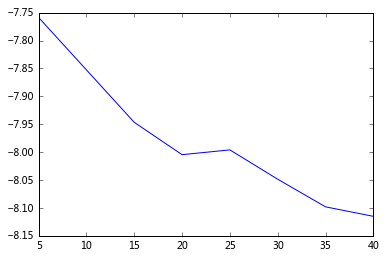

In [33]:
plt.plot([5, 15, 20, 25, 30, 35, 40], perplexity_list)
plt.show()

In [40]:
topictermlist = lda_model.print_topics(-1)
top_words = [[j.split('*')[1] for j in i[1].split(' + ')] for i in topictermlist] 
for i in top_words: 
    print (" ".join(i) )

"八个" "做好" "方面" "重点" "教育" "今年" "学校" "学杂费" "免除" "高校"
"各位" "代表" "宗教" "海洋" "贯彻" "促进" "服务业" "风险" "实施" "调控"
"节能" "环保" "党风廉政" "健全" "意识" "干事" "辉煌成就" "产能" "农民" "基金"
"军队" "合作" "经贸合作" "成绩" "百分点" "国防" "这些" "经济" "国际" "一带"
"民生" "国民经济" "第十三个" "动能" "规划" "过程" "亿多" "五年" "多解" "不能"
"需求" "供给" "动能" "外商投资" "扩大" "投资" "总量" "集群" "有机" "深挖"
"港澳" "供给" "产能" "结构性" "经济运行" "保持" "总体" "改革" "重点" "香港"
"2016" "就业" "重点" "贸易" "诚挚" "表示" "感谢" "基金" "谈判" "协定"
"财政赤字" "救助" "世界反法西斯战争" "安排" "人民" "支付" "基础设施" "地方" "事故" "亿元"
"调控" "自贸" "突出" "协调" "宏观调控" "货币政策" "亿美元" "区间" "提出" "牢固"
"增长" "经济" "生产总值" "目标" "国内" "实现" "中国" "农业" "全面" "生活"
"民族" "脱贫" "政府" "扶贫" "资金" "社区" "万元" "支持" "能力" "社会"
"改革" "金融" "扩大" "合作" "地方" "经济" "投资" "两岸" "完善" "融资"
"领导人" "13" "论坛" "峰会" "货币政策" "左右" "国际" "取得" "医学奖" "总装"
"以下" "一年" "主要" "强国" "创新型" "挑战" "积累" "注入" "动力" "研究"
"回顾" "2015" "安全" "农村" "基础设施" "生产" "建制" "供电" "可靠" "乡镇"
"任务" "举措" "时期" "十三" "主要" "目标" "重大" "创业" "事关" "环境治理"
"增收" "非公有制" "农民" "审批" "保护" "生态" "医保" "补助" "医疗" "事项"
"国有企业" "国有资产" "侨眷" "侨务" "归侨" "向心力" "海内外" "中华儿女" "城

In [49]:
top_words_shares = [[j.split('*')[0] for j in i[1].split(' + ')] for i in topictermlist] 
top_words_shares = [map(float, i) for i in top_words_shares]
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (20.0, 8.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 15)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*1000))
        n += 1

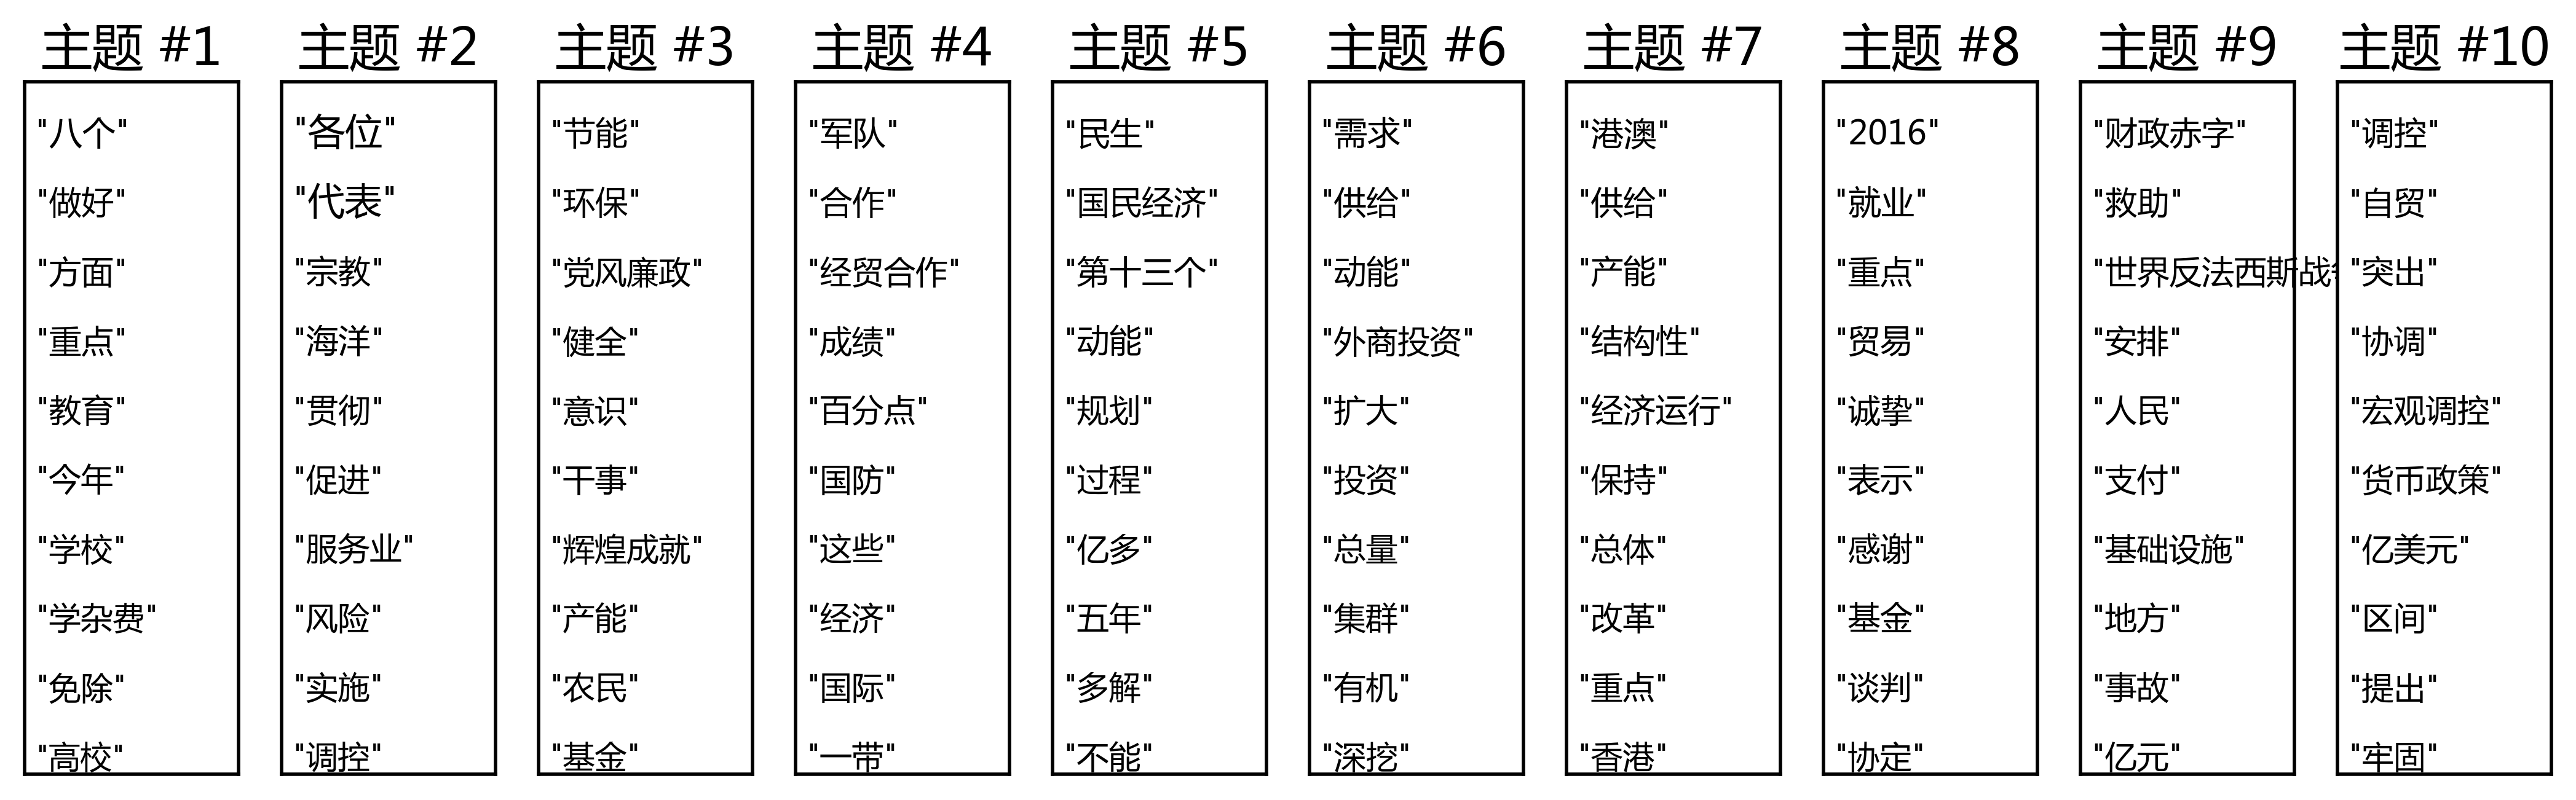

In [53]:
plotTopics(0, 10)


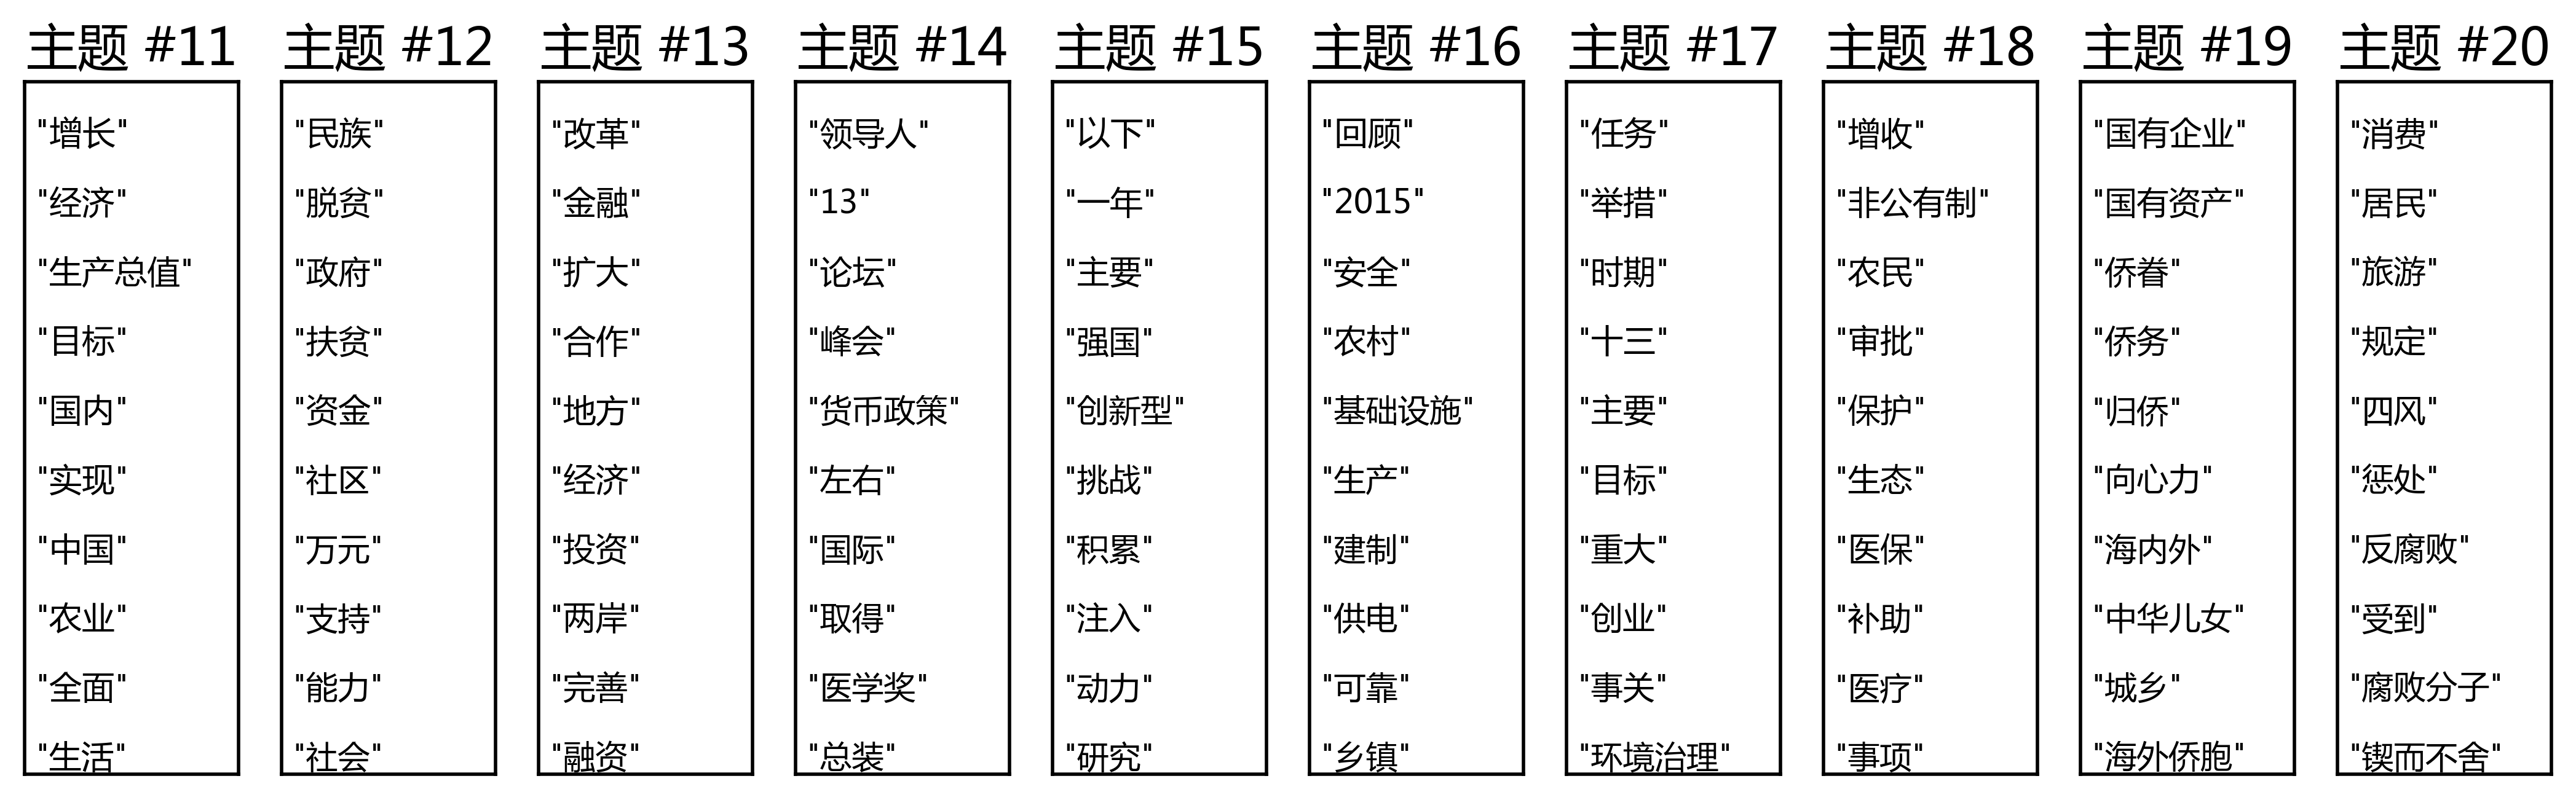

In [54]:
plotTopics(10, 20)

# 阅读材料

Willi Richert, Luis Pedro Coelho, 2013, Building Machine Learning Systems with Python. Chapter 4. Packt Publishing.

东风夜放花千树：对宋词进行主题分析初探 http://chengjun.github.io/cn/2013/09/topic-modeling-of-song-peom/


Chandra Y, Jiang LC, Wang C-J (2016) Mining Social Entrepreneurship Strategies Using Topic Modeling. PLoS ONE 11(3): e0151342. doi:10.1371/journal.pone.0151342